In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import os
import tarfile
import urllib

In [3]:
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#visualizando as variaveis
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts().reset_index()

,ocean_proximity,count
0,<1H OCEAN,9136
1,INLAND,6551
2,NEAR OCEAN,2658
3,NEAR BAY,2290
4,ISLAND,5


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


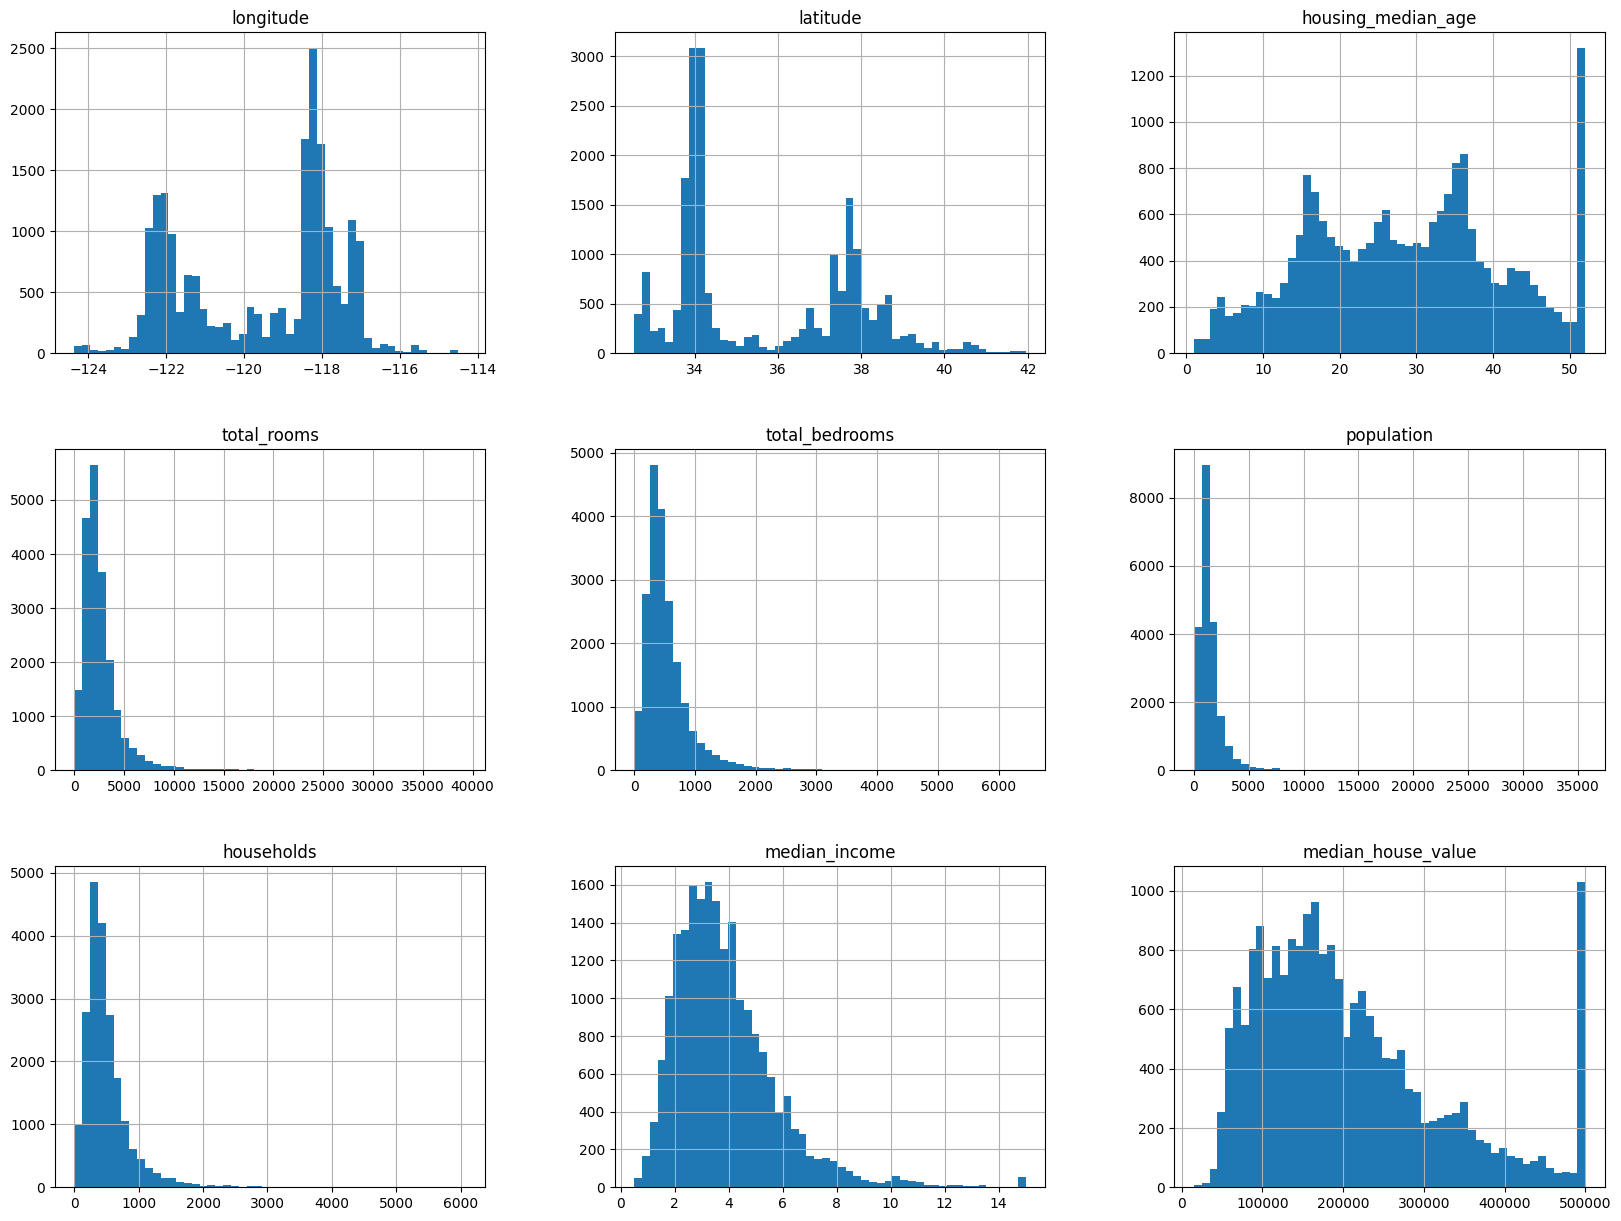

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
# seperando os dados para testes de forma aleatória, geralmente são 20% dos meus dados vão para teste.

def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data)) # devolve números de 0 a 0.999...
  test_set_size = int(len(data) * test_ratio) #número de amostra que vão fazer parte do teste
  test_indices = shuffled_indices[:test_set_size] #juntando os primeiros indices embaralhados para o conjunto de teste.
  train_indices = shuffled_indices[test_set_size:] #usados para treino.
  return data.iloc[train_indices], data.iloc[test_indices] #retorna o treino e teste.

train_set, test_set = split_train_test(housing, 0.2) #separando os 20%
print(len(train_set))
print(len(test_set))


16512
4128



> Destrinchando e entendo o código acima de maneira detalhada

In [65]:
indice = np.random.permutation(len(train_set))
display(indice) # retorna as linhas selecionadas de forma aleatória.

print(" ")

tam_train = print(int(len(train_set) * 0.20)) # separando 20% de registros aleatórios dentro do array
tam_test = print(int(len(test_set) * 0.80)) # separando 20% de registros aleatórios dentro do array

print(" ")

teste = indice[:tam_train] #pegando os indices embaralhados de teste
print(teste)

print(" ")

treino = indice[tam_test:] #pegando os indices embaralhados de treino
print(treino)

print("  ")

print(housing.iloc[treino])
print(housing.iloc[teste])

array([10223, 11241,  8135, ...,   219,  1945,  5063])

 
3302
3302
 
[10223 11241  8135 ...   219  1945  5063]
 
[10223 11241  8135 ...   219  1945  5063]
  
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20041    -118.99     36.06                19.0       2153.0           458.0   
10510    -117.69     33.54                20.0       1767.0           280.0   
1453     -121.97     37.96                28.0       1433.0           290.0   
10330    -117.76     33.83                15.0       3086.0           457.0   
10795    -117.91     33.62                32.0       1997.0           427.0   
...          ...       ...                 ...          ...             ...   
1988     -119.81     36.74                36.0        607.0           155.0   
7294     -118.20     33.98                38.0        867.0           243.0   
936      -122.06     37.54                20.0       6483.0          1068.0   
6052     -117.76     34.04                34.0       1914.0           433.0   
9340     -122.59     37.99  

In [59]:
# len retorna a quantidade de itens
#teste para ver o que a função len faz em DataFrame

nomes = ["Castro", "Fernandes"]
idade = [25, 23]

df = pd.DataFrame(list(zip(nomes, idade)), columns=["Nome", "Idade"])
print(len(df)) #contagem por linha

2


Outra forma de separar o conjunto de dados

In [10]:
# Embora a divisão aleatória mantenha a proporção de treino/teste,
# os dados selecionados mudam a cada execução, dificultando a reprodutibilidade.
# Aqui, usaremos uma abordagem baseada em identificadores fixos para garantir uma divisão consistente.

from zlib import crc32
def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))

  return data.loc[~in_test_set], data.loc[in_test_set]

 # como o dataset não tem uma identificação, criamos um id com o indice da linha.

housing_with_id = housing.reset_index()

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [11]:
# outra maneira de realizar a separação com skitlearn

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<Axes: >

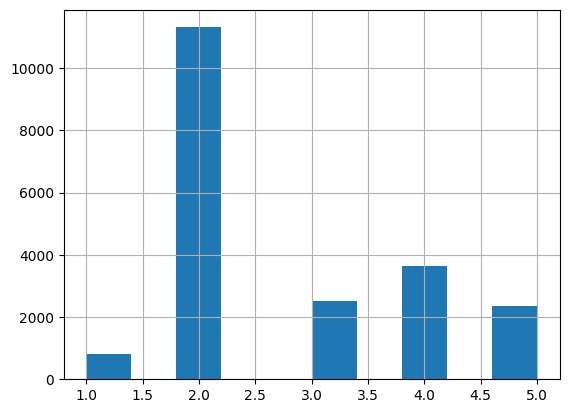

In [12]:
# criando categorias com cut()

housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5,3.9, 4.5, 6., np.inf],labels=[1,2,3,4,5])

housing['income_cat'].hist()

In [13]:
# gerando uma amostragem estratificada

from sklearn.model_selection import StratifiedShuffleSplit #preserva as proporçoes de separação.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index , test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

strat_test_set['income_cat'].value_counts() / len(strat_test_set)

,count
income_cat,
2,0.547965
4,0.176357
3,0.121609
5,0.114341
1,0.039729


In [14]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [15]:
#criando um cópia para manipular meus dados

housing = strat_train_set.copy()

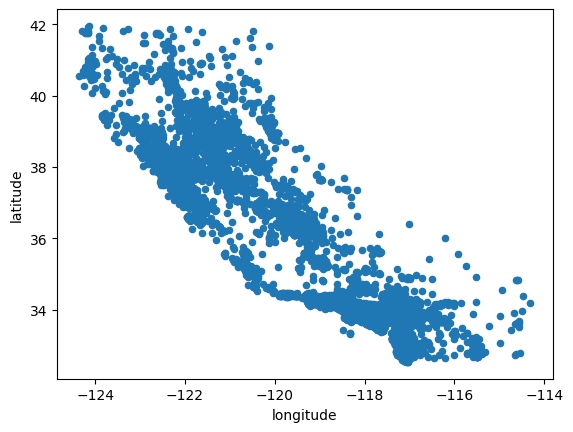

In [16]:
# visualizando os dados das regioes

housing.plot(kind='scatter',x="longitude", y="latitude");

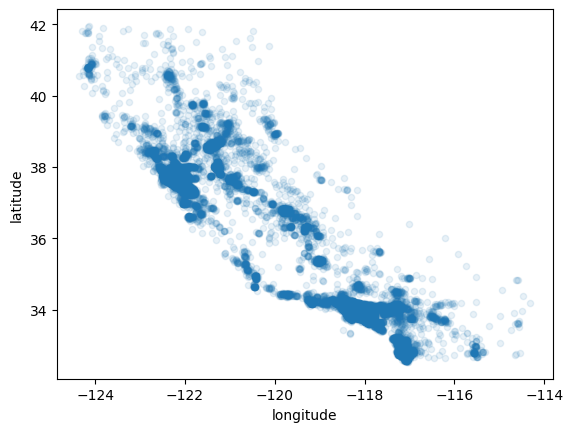

In [17]:
# agora é possível ver aonde possui as densidades mais altas
housing.plot(kind='scatter',x="longitude", y="latitude", alpha=0.1);

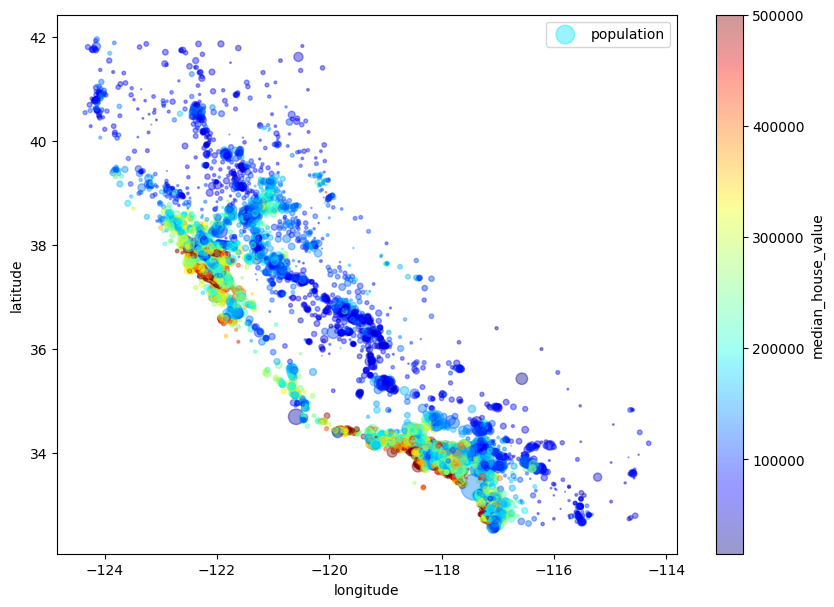

In [18]:
# gerando um gráfico com paletas de cores para ver as regioes mais caras e populacionais

housing.plot(kind='scatter',x="longitude", y="latitude",
             alpha=0.4, s=housing['population']/100, label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()

# o preço dos imoveis está muito relacionado a localização. Quanto mais próximo do mar, mais caro.

In [19]:
#buscando as correlaçoes entre os dados

#corr_matrix = housing[['median_house_value','media_income','total_rooms','housing_median_age','households, total_bedrooms']].corr()
#corr_matrix['median_house_value'].sort_values(ascending=False)

corr_matrix = housing.corr(numeric_only=True) # considerando somente variaveis númericas para correlação
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.686720
total_rooms,0.136409
housing_median_age,0.110498
households,0.067843
total_bedrooms,0.051304
population,-0.022455
longitude,-0.051845
latitude,-0.137477


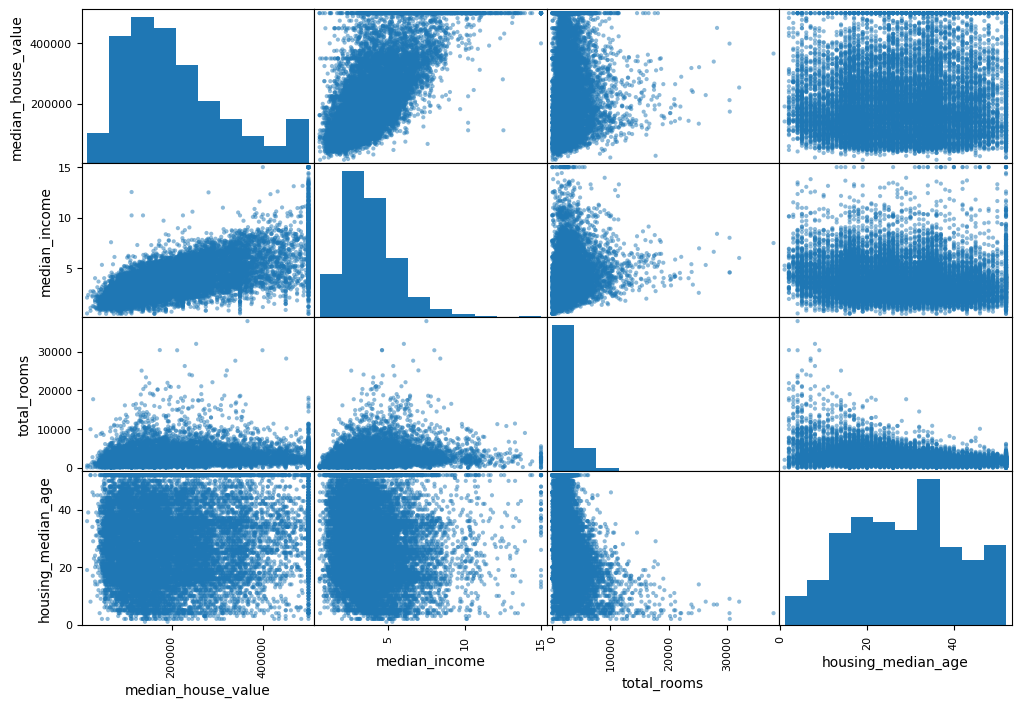

In [20]:
#plotando as correlações das principais variáveis
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8));

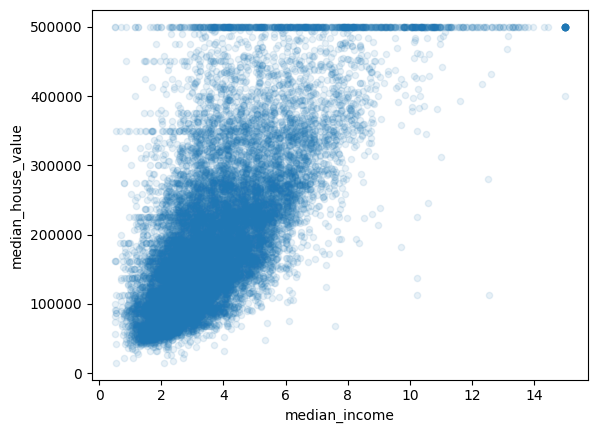

In [21]:
# o atributo mais promissor se trata da renda média

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1);

# conclusão: quanto maior a renda, maior o preço dos imoveis.

In [22]:
#analisando novas correlações

housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False).reset_index()

,index,median_house_value
0,median_house_value,1.000000
1,median_income,0.686720
2,rooms_per_household,0.148117
3,total_rooms,0.136409
4,housing_median_age,0.110498
5,households,0.067843
6,total_bedrooms,0.051304
7,population,-0.022455
8,population_per_household,-0.025098
9,longitude,-0.051845


#Preparando os algoritmos para o aprendizado de máquina

In [23]:
housing = strat_train_set.drop("median_house_value", axis=1) # dropando a coluna
housing_labels = strat_train_set["median_house_value"].copy()

# Limpeza dos dados

In [24]:
median = housing["total_bedrooms"].median() #media
housing["total_bedrooms"].fillna(median, inplace=True) #incluindo a média em valores nulos

/tmp/ipython-input-24-1087494825.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True) #incluindo a média em valores nulos


In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [26]:
#removendo os atributos nao númericos para realizar a média

housing_num = housing.drop("ocean_proximity", axis=1)

In [27]:
#ajustando as instancias
# realizará a média de cada atributo da tabela e aplicar em valores nulos

imputer.fit(housing_num) # aplicando a estimativa

SimpleImputer(strategy='median')

In [28]:
#observando os atributos

imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2119.    ,  433.    , 1163.    ,
        408.    ,    3.5377])

In [29]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2119.    ,  433.    , 1163.    ,
        408.    ,    3.5377])

In [30]:
#substituindo os valores pela média aprendida

x = imputer.transform(housing_num)

In [31]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)

In [32]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1701,-122.30,37.97,30.0,4030.0,772.0,1777.0,718.0,3.6393
947,-121.92,37.72,22.0,4638.0,716.0,2302.0,687.0,5.3470
10318,-117.81,33.84,17.0,4343.0,515.0,1605.0,484.0,10.5981
2487,-120.35,36.16,18.0,1519.0,296.0,846.0,272.0,2.7792
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500
...,...,...,...,...,...,...,...,...
4492,-118.22,34.06,52.0,48.0,6.0,41.0,10.0,10.2264
16028,-122.45,37.73,52.0,2035.0,424.0,1193.0,430.0,5.0634
10572,-117.68,33.65,6.0,10395.0,1915.0,4783.0,1811.0,5.9280
19345,-122.82,38.64,29.0,2176.0,385.0,1117.0,374.0,3.8681


Variavel Categórico

In [33]:
# trabalhando com texto no meu modelo de ml

#verificando meu único atributo categórico
housing_cat = housing["ocean_proximity"]
print(housing_cat.head(10))
print(" ")
print(housing_cat.unique())

1701      NEAR BAY
947      <1H OCEAN
10318    <1H OCEAN
2487        INLAND
11964       INLAND
15090    <1H OCEAN
11148    <1H OCEAN
16601    <1H OCEAN
2421        INLAND
10742    <1H OCEAN
Name: ocean_proximity, dtype: object
 
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [34]:
#transformando minha variavel categórica em número

housing_cat = housing[["ocean_proximity"]]

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) # transform : transforma um conjunto de dados em um parametro.
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [35]:
# transformando meu conjunto de dados em dados binarios (0 ou 1), codificação chamada de one-hot encoding ou ainda classificação distribuída

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

#gera uma matrix esparsa SciPy, não um array, gerando varias colunas com o número \n
#um aparecendo somente uma vez por linha. Dessa forma, armazena apenas a localização dos elementos diferentes de zero.

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [36]:
#vendo em formato array

housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room=True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self
  def transform(self,X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# **Escalonamento das Características **

Tirando algumas exceçoes os algortimos de aprendizado de máquina não performa tão bem com números muitos distantes entre si, como 6 a 39.320, como exemplo. Para ajustar esses dados e haver algo mais "padronizado" e melhorando a performance do modelo, existem duas formas comuns de todos os atributos terem a mesma escala.

1. Escalonamento de min-max
2. Padronização

1.1  Os valores são deslocados e reescalonados de modo que acabam variando entre de 0 a 1. Subtraindo o min e dividindo pelo maximo e depois subtraindo pelo minimo. (min/max) - min. Pelo Sciket-learn é possível realizar atra'ves da função MinMaxScaler que comporta um hiperparametro feature_range que permite alteraçoes de 0 ou 1.

2.2 valor_medio / desvio_padrao, para que o resultado tenha variação de unidade. A padronização não vincula valoresa um intervalo especifico, que pode ser problematico para alguns algoritmos como redes neurais. O Sciket-learn oferece um transformador chamado de StandartScaler

In [38]:
#transformação de pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('attribs_adder', CombinedAttributesAdder()),
  ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [39]:
# aplicando para qualquer tipo de atributo, seja categórico ou não

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # nomes das colunas númericas
cat_attribs = ["ocean_proximity"] # nomes das colunas categóricas

full_pipeline = ColumnTransformer([ #lista de tuplas que o transformador precisa ser aplicado
    ("num", num_pipeline, num_attribs), # deve ser transformada pelo num_pipeline que foi definido
    ("cat",OneHotEncoder(), cat_attribs) # deve ser transformada pelo OneHotEncoder que foi definido
])

housing_prepared = full_pipeline.fit_transform(housing)

# Treinando meu Modelo

In [40]:
# REGRESSÃO LINEAR

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [41]:
#testando o modelono conjuto de treinamento

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predição: ", lin_reg.predict(some_data_prepared))
print(" ")
print("Valores: ", list(some_labels))

Predição:  [231684.70203531 261722.1931289  457220.04571361 125271.43076969
 117272.04127677]
 
Valores:  [184000.0, 219500.0, 460100.0, 85300.0, 97800.0]


In [42]:
# Calcula o RMSE (erro quadrático médio da raiz) no conjunto de treino,
# que mostra o quanto, em média, as previsões do modelo estão distantes do valor real.

from sklearn.metrics import mean_squared_error #erro quadratico médio
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"erro de : {lin_rmse}")

erro de : 68089.83578507432


In [43]:
# treinando com decision tree

from sklearn.tree import DecisionTreeRegressor # identifica relacionamentos não lineares complexos nos dados
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [44]:
# AVALIANDO NO CONJUNTO DE TREINAMENTO

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(f"erro de : {tree_rmse}")

# pelo resultado, é mais cedo que o modelo tenha se sobreajustado nos dados

erro de : 0.0


In [45]:
#VALIDAÇÃO CRUZADA

# Uma forma de avaliar uma arvore de decisão é através do k-fold, que divide de maneira aleatória o conjunto de treinameno em 10 subconjuntos distintos chamados folds.
# depois treina e avalia a arvore de decisão 10x, escolhendo sempre um fold para avaliação entre os 10. Gerando um array, com 10 classificações de avaliação.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error",cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [46]:
#observando o resultado

def display_scores(scores):
  print("Scores:",scores)
  print("Mean:",scores.mean())
  print("Standard deviation:",scores.std())

display_scores(tree_rmse_scores)

Scores: [75971.36796936 70770.38087018 72298.05779575 71574.33417149
 71368.89204063 73598.31054288 71526.19663795 73227.93869561
 69918.14929883 73707.81684299]
Mean: 72396.14448656721
Standard deviation: 1670.940145018163


In [47]:
#calculando os mesmos scores para regressão linear

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

# conclusão: o modelo de arvore de decisão está sobreajustando tanto que que acaba sendo pior que a regressão linear

Scores: [68175.35463094 66161.32515538 69095.12852597 67157.28026842
 69188.03895455 73143.50949975 66935.30738399 66776.23364563
 67490.00472764 69233.21712251]
Mean: 68335.5399914787
Standard deviation: 1909.8247889192855


In [48]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
print(forest_reg)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

RandomForestRegressor()
Scores: [50923.85368409 49355.6421086  49018.96247402 51972.13177667
 50946.98553867 52590.13421691 48251.88479367 50033.04608792
 48499.56900838 51620.02291881]
Mean: 50321.22326077392
Standard deviation: 1436.208215050424
